In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Ejercicio de regresión

Se quiere determinar la relación entre la concentración de cierto fármaco en el torrente sanguíneo y el tiempo transcurrido desde que se administró el fármaco. Se recopila datos sobre la concentración de la droga en el torrente sanguíneo en diferentes intervalos de tiempo después de la administración.

In [2]:
dataset = pd.read_csv("datasets/drug.csv") # cargando los datos desde un csv
dataset.head() 

,Time,Concentration
0,0.000000,98.607801
1,0.200930,98.640061
2,0.246241,91.323087
3,0.303356,85.141347
4,0.364378,93.402487


In [3]:
dataset.describe()

,Time,Concentration
count,50.000000,50.000000
mean,1.837241,61.162161
std,1.122143,23.448881
min,0.000000,13.684360
25%,1.002335,42.859060
50%,1.646105,63.195569
75%,2.808956,80.721376
max,4.000000,98.640061


<Axes: >

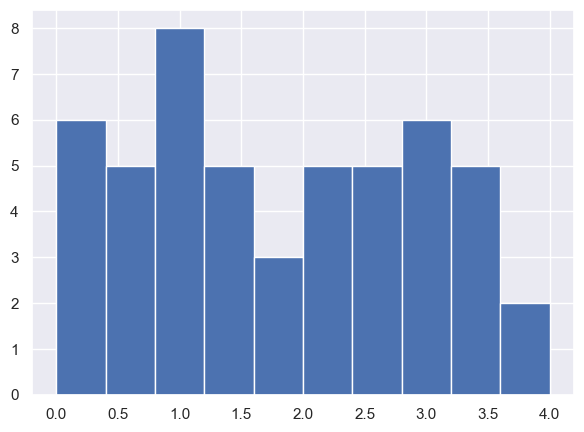

In [4]:
# Pandas nos da algunas herramientas de graficado
plt.figure(figsize=(7, 5))
dataset.Time.hist()

<Axes: >

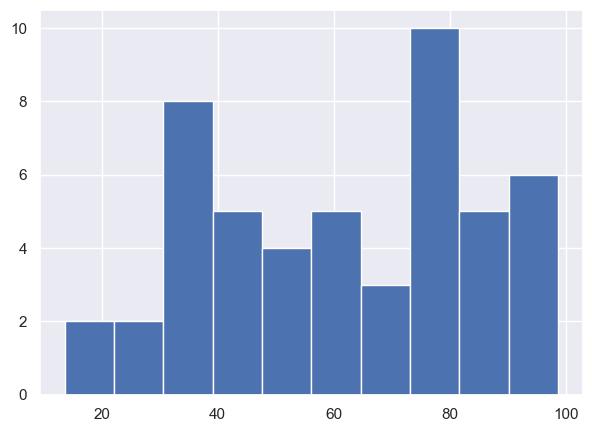

In [5]:
plt.figure(figsize=(7, 5))
dataset.Concentration.hist()

<Axes: >

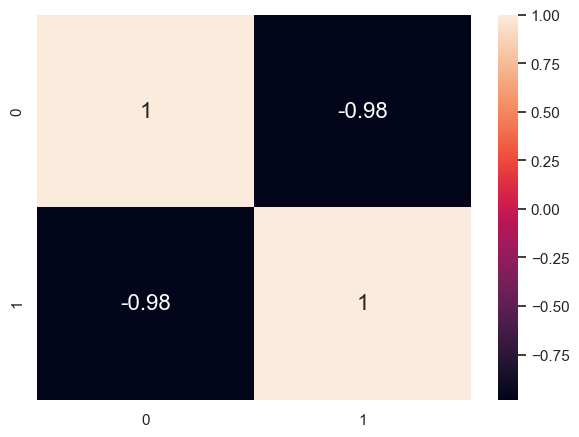

In [6]:
# podemos ver cual es la relacion entre ambas variables....

plt.figure(figsize=(7, 5))
correlacion_drug = np.corrcoef(dataset["Time"], dataset["Concentration"])
sns.heatmap(data=correlacion_drug, annot=True, annot_kws={"size": 16})

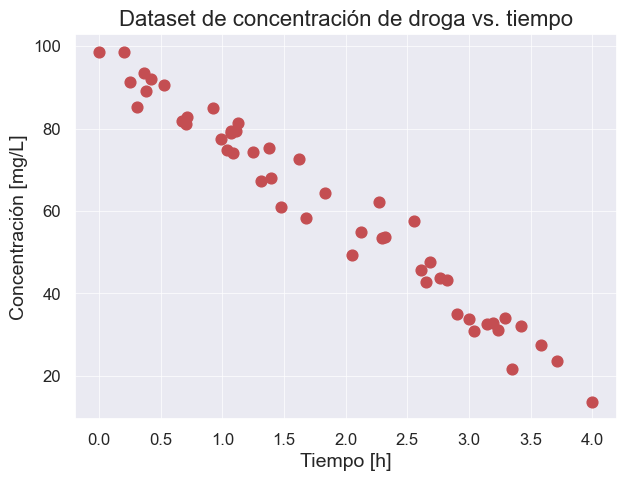

In [7]:
# Graficamos el dataset

plt.figure(figsize=(7, 5))
plt.scatter(dataset['Time'], dataset['Concentration'] , color='r', marker="o",s=60)
plt.grid(True, linewidth=0.5)
plt.xlabel('Tiempo [h]', fontsize=14)
plt.ylabel('Concentración [mg/L]', fontsize=14)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.title('Dataset de concentración de droga vs. tiempo', fontsize=16)
plt.show()

Ya tenemos los datos y de hecho vemos que hay una relacion lineal entre las dos variables, por lo tanto asumimos que es podemos usar **regresion lineal simple** (ya que hay una variable independiente y otra dependiente) para poder resolver nuestro problema.

Ahora vamos a armar nuestro modelo, para ello vamos a utilizar el proceso que vimos de Machine Learning

![proceso ML](./img/proceso_ml.png)

Es decir, necesitaremos datos de entrenamiento y datos de test. Esto se puede hacer facilmente con la libreria **scikit-learn** que nos permite separar nuestros datos para entrenar y para testear el funcionamiento de nuestro modelo.

Puedes tambien visitar la pagina de scikit-learn [Aca](https://scikit-learn.org/stable/).

Para instalarlo, hacemos 

```!pip install scikit-learn```

In [8]:
# importando modulo para separar datos de entrenamiento y testeo de scikit-learn
from sklearn.model_selection import train_test_split

In [9]:
# Armamos array de Numpy con los features
X = dataset.iloc[:,:-1].values
# Y con la variable dependendiente (target)
y = dataset.iloc[:,1].values

In [10]:
# valores de X
X

array([[0.        ],
       [0.20093023],
       [0.24624091],
       [0.30335608],
       [0.36437762],
       [0.37804245],
       [0.41726206],
       [0.52664026],
       [0.67136455],
       [0.70371625],
       [0.71487937],
       [0.92421516],
       [0.99166843],
       [1.03433411],
       [1.06632353],
       [1.06684465],
       [1.08498864],
       [1.1116566 ],
       [1.1255107 ],
       [1.24788839],
       [1.31363883],
       [1.37990584],
       [1.39753805],
       [1.47590862],
       [1.61755028],
       [1.67465879],
       [1.82984097],
       [2.05162618],
       [2.12676623],
       [2.26594038],
       [2.29190579],
       [2.3148633 ],
       [2.55060136],
       [2.60635642],
       [2.65231717],
       [2.68179271],
       [2.76302767],
       [2.82426536],
       [2.90335972],
       [2.99669985],
       [3.03825094],
       [3.14577205],
       [3.19331086],
       [3.23491285],
       [3.28814387],
       [3.34446643],
       [3.42352123],
       [3.583

In [11]:
# valores de y
y

array([98.60780096, 98.64006089, 91.32308675, 85.14134721, 93.40248721,
       89.19702687, 91.93161   , 90.53379609, 81.72769346, 81.12625764,
       82.73059113, 84.98982066, 77.4482906 , 74.83698181, 78.83294559,
       79.39427582, 74.13205049, 79.50673097, 81.30811954, 74.28492958,
       67.27378292, 75.29065005, 68.05526468, 61.04493591, 72.71108358,
       58.2788246 , 64.3412913 , 49.30224468, 54.95283408, 62.04984702,
       53.37794642, 53.58464081, 57.47557104, 45.75174437, 42.71569676,
       47.52170097, 43.80666284, 43.28915119, 34.92375512, 33.82101205,
       30.92867323, 32.65081497, 32.72684433, 31.03966044, 33.91875215,
       21.54699719, 32.00998314, 27.38229872, 23.55511858, 13.68435978])

In [12]:
# Cantidad de elementos en X y en y
print("Cantidad de elementos en 'X':", X.shape[0])
print("Cantidad de elementos en 'y':", y.shape[0])

Cantidad de elementos en 'X': 50
Cantidad de elementos en 'y': 50


Separamos el dataset de entrenamiento y testeo. Para este problema usamos el tamaño del test de 30% aprox.

In [13]:
# Separando nuestro dataset en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
# Datos de train y de test
print("Valores de X_train:",X_train.size)
print("Valores de y_train:",y_train.size)
print("Valores de X_test:",len(X_test))
print("Valores de y_test:",len(y_test))

Valores de X_train: 35
Valores de y_train: 35
Valores de X_test: 15
Valores de y_test: 15


Para aplicar el modelo de regresion lineal, la forma de implementarlo usando **scikit-learn**, parametros y formas de uso la podemos encontrar [aca](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

In [15]:
# Creando el modelo de regresion lineal simple:
from sklearn.linear_model import LinearRegression
regresion = LinearRegression()

In [16]:
# Y lo entrenamos, con el set de entrenamiento
regresion.fit(X_train, y_train)

LinearRegression()

In [17]:
# Una vez entrenado, podemos ver diferente informacion del modelo:

print(f"El valor de la interseccion de la recta sera {regresion.intercept_ }")
print(f"El valor del coeficiente de la recta sera {regresion.coef_ }")
print(f"La ecuación de la recta entonces sera la siguiente: y = {regresion.intercept_ }+({regresion.coef_[0]})X")

El valor de la interseccion de la recta sera 99.52593616837214
El valor del coeficiente de la recta sera [-20.75590118]
La ecuación de la recta entonces sera la siguiente: y = 99.52593616837214+(-20.755901181716162)X


In [18]:
print(f"El coeficiente de Pearson es {regresion.score(X_train, y_train)}")

El coeficiente de Pearson es 0.973206000703601


In [19]:
# Calculamos el desvío estándar del modelo
std_dev_model = np.sqrt((np.sum((y_train - regresion.predict(X_train))**2))/(y_train.size))
print(f"Desvío estándar del modelo {std_dev_model}")

Desvío estándar del modelo 3.893340142374289


(0.0, 103.81801498759515)

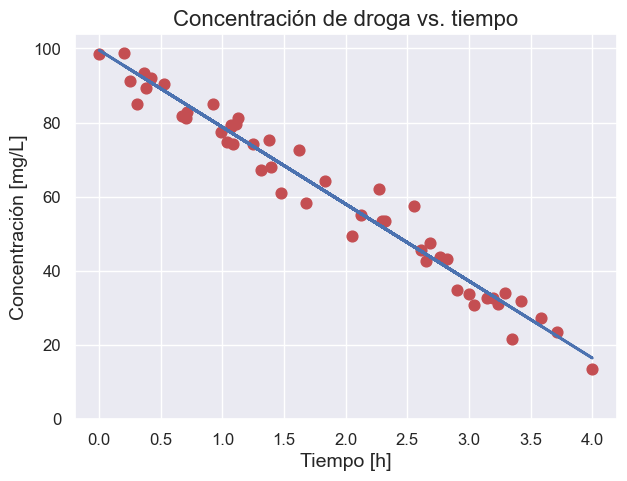

In [20]:
# y si lo graficamos? graficar siempre nos dara una mejor idea de lo que sucede

plt.figure(figsize=(7, 5))
plt.title('Concentración de droga vs. tiempo', fontsize=16)
plt.xlabel('Tiempo [h]', fontsize=14)
plt.ylabel('Concentración [mg/L]', fontsize=14)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

plt.scatter(dataset['Time'], dataset['Concentration'], color='r', marker="o", s=60)
plt.plot(X_train, regresion.predict(X_train), color="b", linewidth=2)

plt.ylim(0)  # Establece el límite inferior del eje y en cero

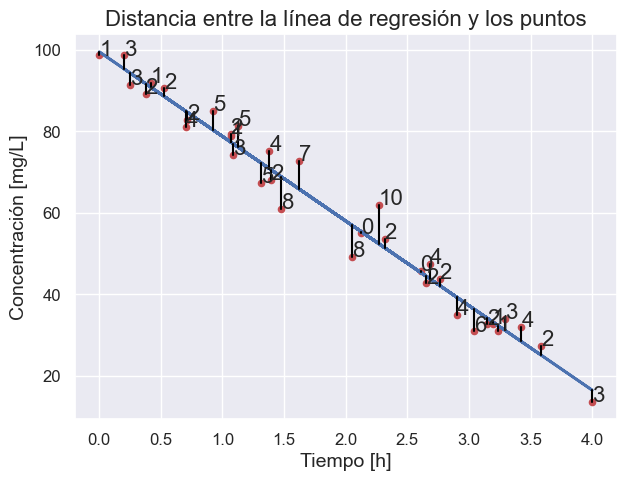

In [21]:
# Convertir X_train en un vector unidimensional
X_train = X_train.flatten()

# Regresión lineal
regression = np.polyfit(X_train, y_train, 1)
regression_line = np.polyval(regression, X_train)

# Calcular las distancias entre los puntos y la línea de regresión
distances = np.abs(regression_line - y_train)

# Graficar los puntos
plt.figure(figsize=(7, 5))
plt.scatter(X_train, y_train, color='r', s=20)

# Graficar la línea de regresión
plt.plot(X_train, regression_line, color='b', linewidth=2)

# Graficar las líneas perpendiculares desde cada punto a la línea de regresión
for x, y, distance in zip(X_train, y_train, distances):
    plt.plot([x, x], [y, regression[0]*x + regression[1]], color='black', linestyle='-')
    plt.text(x, y, f'{distance:.0f}', ha='left', va="baseline", fontsize=16)

# Configuraciones adicionales
plt.title("Distancia entre la línea de regresión y los puntos", fontsize=16)
plt.xlabel('Tiempo [h]', fontsize=14)
plt.ylabel('Concentración [mg/L]', fontsize=14)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

# Mostrar el gráfico
plt.show()

----
## Metricas

Entrenamos el modelo, pero para validar si está bien entrenado, debemos usar el dataset de testeo. 

Vamos a aplicar las siguientes metricas de evaluación usando scikit-learn:
- R2
- MAE
- MSE
- RMSE
- MAPE
- MPE

In [22]:
#Primero obtenemos las predicciones del modelo
y_pred = regresion.predict(X_test)

In [23]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [24]:
#sklean no tiene el error porcentual medio (MPE) lo vamos a crear nosotros
def mean_porcentual_error(yreal, ypred):

    return np.mean((yreal-ypred)/yreal)

In [25]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
mpe = mean_porcentual_error(y_test, y_pred)
print("R-cuadrado en test:", r2)
print("Error absoluto medio:", mae)
print("Error cuadratico medio:", mse)
print("Raiz de error cuadratico medio:", rmse)
print("Error absoluto porcentual medio:", mape*100)
print("Error porcentual medio:", mpe*100)

R-cuadrado en test: 0.9485007402398677
Error absoluto medio: 3.928969082277492
Error cuadratico medio: 24.5142570406657
Raiz de error cuadratico medio: 4.951187437440205
Error absoluto porcentual medio: 8.26391034313083
Error porcentual medio: -2.628429845591027


Estas no son las unicas métricas que se pueden calcular. Scikit-learn documenta varias [metricas de regresión](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)

Una vez que tenemos el modelo, y estamos conforme, podemos guardarlo:

In [26]:
# Podemos utilizar pickle, existen otras herramientas pero con esto bastara.
import pickle

with open('modelo_regresion_lineal.pkl', 'wb') as archivo:
    pickle.dump(regresion, archivo)

In [27]:
#Podemos llamarlo para usarlo con otros valores y predecir segun lo que nosotros queremos.

with open('modelo_regresion_lineal.pkl', 'rb') as archivo:
    modelo_cargado = pickle.load(archivo)

In [28]:
# Pasandole nuevos datos a por predecir.....ojo con la forma de pasarlos!
X_pred = np.array([ [1], [4.5] ]) # Quiero predecir valores para 1 y 4 horas y media

predicciones = modelo_cargado.predict(X_pred) 
predicciones

array([78.77003499,  6.12438085])

----
## Regresión lineal multiple

Aunque se uso un ejemplo de una regresión lineal simple, todo lo que vimos sirve exactamente para un problema n-dimensional.

Este dataset proviene de [acá](https://www.kaggle.com/datasets/farhanmd29/50-startups). Este conjunto de datos tiene datos recopilados de Nueva York, California y Florida sobre 50 empresas emergentes. Las variables utilizadas en el conjunto de datos son ganancias, gasto en I+D, gasto administrativo y gasto en marketing. 

Queremos predecir la ganancia usando las otras variables. Pero tenemos un problema inicial

In [29]:
dataset = pd.read_csv("datasets/50_Startups.csv") 
dataset.head() 

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


Vemos que *State* es una variable categorica.

In [31]:
dataset["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [32]:
dataset["State"].nunique()

3

In [33]:
dataset["State"].value_counts()

State
New York      17
California    17
Florida       16
Name: count, dtype: int64

Como hacemos para introducir una variable categorica en un modelo matematico? Usando variables Dummies.

In [34]:
dataset_with_dummies = pd.get_dummies(data=dataset, columns=['State'])

In [35]:
dataset_with_dummies.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,False,False,True
1,162597.70,151377.59,443898.53,191792.06,True,False,False
2,153441.51,101145.55,407934.54,191050.39,False,True,False
3,144372.41,118671.85,383199.62,182901.99,False,False,True
4,142107.34,91391.77,366168.42,166187.94,False,True,False


In [36]:
# Convertimos a todo en float
dataset_with_dummies = dataset_with_dummies.astype('float')
dataset_with_dummies.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0.0,0.0,1.0
1,162597.70,151377.59,443898.53,191792.06,1.0,0.0,0.0
2,153441.51,101145.55,407934.54,191050.39,0.0,1.0,0.0
3,144372.41,118671.85,383199.62,182901.99,0.0,0.0,1.0
4,142107.34,91391.77,366168.42,166187.94,0.0,1.0,0.0


Esto lo pueden hacer tambien con scikit-learn usando LabelEncoder, OneHotEncoder, make_column_transformer.

In [37]:
#Quitamos una columna de las variables dummy
dataset_with_dummies.drop(columns="State_New York", inplace=True)

In [38]:
dataset_with_dummies = dataset_with_dummies[["R&D Spend", "Administration", "Marketing Spend", "State_California", "State_Florida", "Profit"]]
dataset_with_dummies.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,Profit
0,165349.20,136897.80,471784.10,0.0,0.0,192261.83
1,162597.70,151377.59,443898.53,1.0,0.0,191792.06
2,153441.51,101145.55,407934.54,0.0,1.0,191050.39
3,144372.41,118671.85,383199.62,0.0,0.0,182901.99
4,142107.34,91391.77,366168.42,0.0,1.0,166187.94


<Axes: >

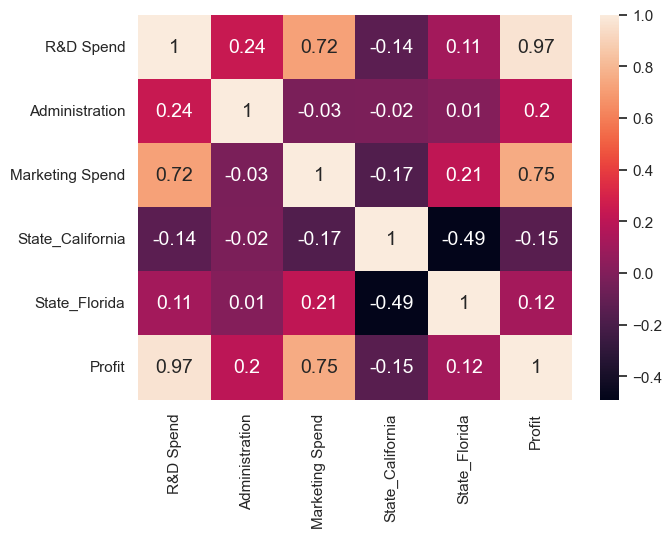

In [39]:
# Podemos ver cual es la relacion entre variables, recordemos, es mejor con la variable objetivo, pero malo si es entre variables de entrada....
plt.figure(figsize=(7, 5))
correlacion_profit = dataset_with_dummies.corr().round(2)
sns.heatmap(data=correlacion_profit, annot=True, annot_kws={"size": 14})

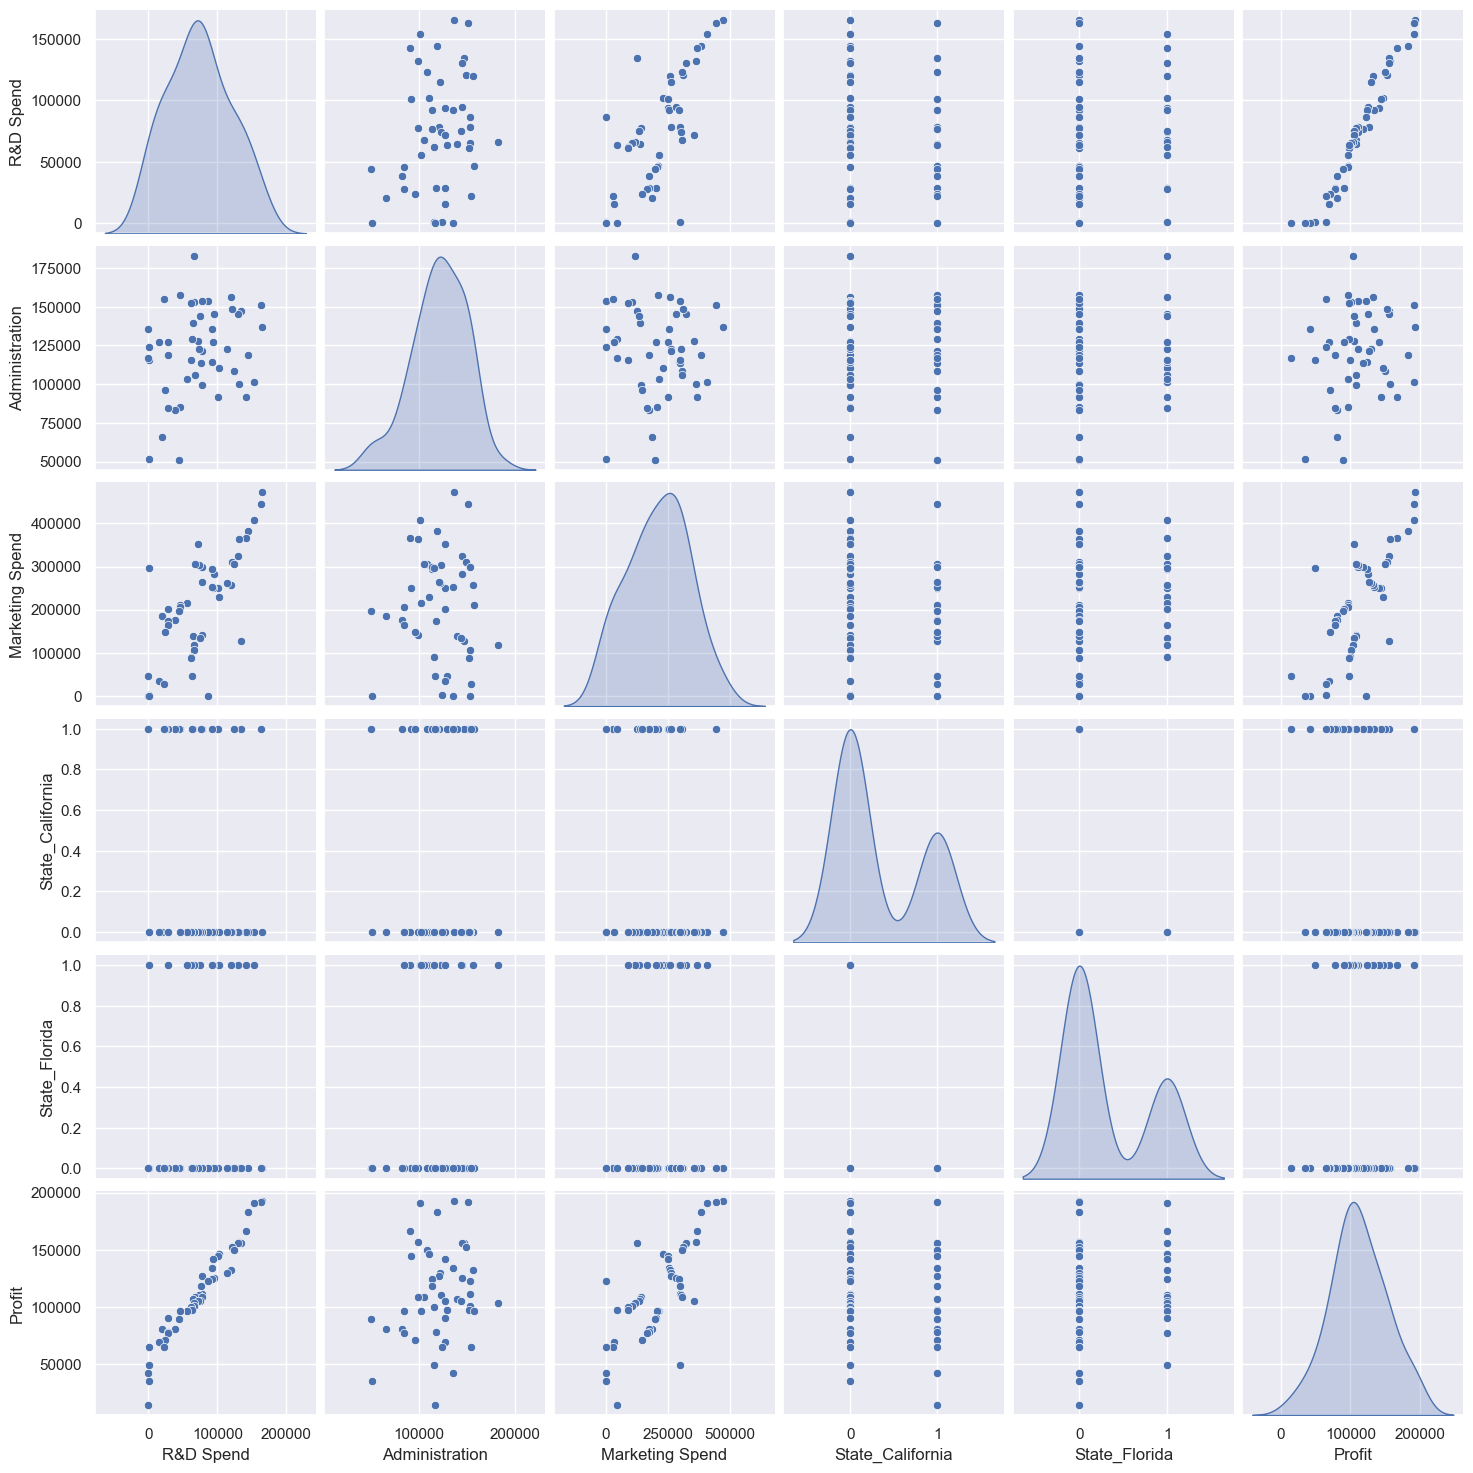

In [40]:
sns.pairplot(data=dataset_with_dummies, diag_kind="kde");

Porque tengo muchas variables no significa que debo aplicarla al modelo sin ningun criterio. Como vemos, hay variables que estan correlacionadas que nos pueden dar problemas.

Recordemos la maxima: Garbage in + garbage out.

Ademas, muchas variables es problema a futuro. Nos puede dificultar los pipelines y hacer mas dificil de entender los datos.

### Apliquemos la regresión

In [41]:
# Armamos array de Numpy con los features
X = dataset_with_dummies.iloc[:,:-1].values
# Y con la variable dependendiente (target)
y = dataset_with_dummies.iloc[:,-1].values

In [42]:
# Separando nuestro dataset en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Datos de train y de test
print("Dimension de X_train:",X_train.shape)
print("Valores de y_train:",y_train.size)
print("Dimension de X_test:",X_test.shape)
print("Valores de y_test:",len(y_test))

Dimension de X_train: (35, 5)
Valores de y_train: 35
Dimension de X_test: (15, 5)
Valores de y_test: 15


In [43]:
regresion = LinearRegression()

regresion.fit(X_train, y_train)

print(f"El valor de la interseccion de la recta sera {regresion.intercept_ }")
print(f"Los valores de los coeficientes de la recta sera {regresion.coef_ }")

El valor de la interseccion de la recta sera 56177.48398246168
Los valores de los coeficientes de la recta sera [ 8.04937292e-01 -9.12577104e-02  2.80672826e-02  1.23515673e+03
  1.69322751e+03]


In [44]:
print(f"El coeficiente de Pearson es {regresion.score(X_train, y_train)}")

El coeficiente de Pearson es 0.9511471170962384


In [45]:
# Calculamos el desvío estándar del modelo
std_dev_model = np.sqrt((np.sum((y_train - regresion.predict(X_train))**2))/(y_train.size))
print(f"Desvío estándar del modelo {std_dev_model}")

Desvío estándar del modelo 9030.803518990464


In [46]:
#Otenemos las predicciones del modelo
y_pred = regresion.predict(X_test)

In [47]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
mpe = mean_porcentual_error(y_test, y_pred)
print("R-cuadrado en test:", r2)
print("Error absoluto medio:", mae)
print("Error cuadratico medio:", mse)
print("Raiz de error cuadratico medio:", rmse)
print("Error absoluto porcentual medio:", mape*100)
print("Error porcentual medio:", mpe*100)

R-cuadrado en test: 0.9397108063361512
Error absoluto medio: 7395.433531481478
Error cuadratico medio: 84826955.0345284
Raiz de error cuadratico medio: 9210.154995141418
Error absoluto porcentual medio: 8.92986534410029
Error porcentual medio: 0.19865116142473146


----
### Selección de modelo

Para seleccionar el modelo vamos a usar otra libreria especializada en herramientas estadisticas, llamada [statsmodels](https://www.statsmodels.org/stable/index.html).

Vamos a usar la clase OLS que implementa regresiones lineales ordinarias pero ademas realiza automaticamete el calculo de criterios de selección.

In [48]:
import statsmodels.api as sm

# El modelo de statsmodel necesita una entrada para el termino independiente.
# Para ello vamos a agregar una columna de 1 en la primera columna
X_statsmodels = np.append(arr = np.ones((X.shape[0],1)).astype(int), values = X, axis = 1)

# Nivel de significancia que vamos a usar
SL = 0.05

In [49]:
X_statsmodels[0, :]

array([1.000000e+00, 1.653492e+05, 1.368978e+05, 4.717841e+05,
       0.000000e+00, 0.000000e+00])

Vamos a aplicar el metodo de construccion de eliminación hacia atrás. Empezamos con el modelo con todas las variables. Para este proceso vamos a usar todo el conjunto de datos.

In [50]:
X_opt = X_statsmodels[:, [0, 1, 2, 3, 4, 5]]
regression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           1.34e-27
Time:                        22:57:42   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.008e+04   6952.587      7.204      0.000    3.61e+04    6.41e+04
x1             0.8060      0.046     17.369      0.000       0.712       0.900
x2            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x3             0.0270      0.017      1.574      0.123      -0.008       0.062
x4            41.8870   3256.039      0.013      0.990   -6520.229    6604.003
x5           240.6758   3338.857      0.072      0.943   -6488.349    6969.701
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.47e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Vemos que la variable 4 tiene el mayor nivel de significancia y supera el limite que impusimos de 0.05. La eliminamos.

In [51]:
X_opt = X_statsmodels[:, [0, 1, 2, 3, 5]]
regression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           8.49e-29
Time:                        22:57:43   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
x1             0.8060      0.046     17.606      0.000       0.714       0.898
x2            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x3             0.0270      0.017      1.592      0.118      -0.007       0.061
x4           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Vemos que la variable 5 tiene el mayor nivel de significancia y supera el limite que impusimos de 0.05. La eliminamos

In [52]:
X_opt = X_statsmodels[:, [0, 1, 2, 3]]
regression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           4.53e-30
Time:                        22:57:43   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Vemos que la variable 2 tiene el mayor nivel de significancia y supera el limite que impusimos de 0.05. La eliminamos

In [53]:
X_opt = X_statsmodels[:, [0, 1, 3]]
regression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           2.16e-31
Time:                        22:57:44   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

En este último paso, ninguna variable esta por encima del nivel de significancia. Entonces elegimos para hacer la regresión a las variables de entradas "R&D Spend" y "Marketing Spend". Recordemos que eran la que mejor correlación nos daban.

In [59]:
# Armamos array de Numpy con los features
X = dataset_with_dummies[["R&D Spend", "Marketing Spend"]].values
# Y con la variable dependendiente (target)
y = dataset_with_dummies.iloc[:,-1].values

In [60]:
# Separando nuestro dataset en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Datos de train y de test
print("Dimension de X_train:",X_train.shape)
print("Valores de y_train:",y_train.size)
print("Dimension de X_test:",X_test.shape)
print("Valores de y_test:",len(y_test))

Dimension de X_train: (35, 2)
Valores de y_train: 35
Dimension de X_test: (15, 2)
Valores de y_test: 15


In [61]:
regresion = LinearRegression()

regresion.fit(X_train, y_train)

print(f"El valor de la interseccion de la recta sera {regresion.intercept_ }")
print(f"Los valores de los coeficientes de la recta sera {regresion.coef_ }")

El valor de la interseccion de la recta sera 45517.06073621356
Los valores de los coeficientes de la recta sera [0.77738669 0.03888357]


In [62]:
print(f"El coeficiente de Pearson es {regresion.score(X_train, y_train)}")

El coeficiente de Pearson es 0.9482660138683449


In [63]:
# Calculamos el desvío estándar del modelo
std_dev_model = np.sqrt((np.sum((y_train - regresion.predict(X_train))**2))/(y_train.size))
print(f"Desvío estándar del modelo {std_dev_model}")

Desvío estándar del modelo 9293.285214407317


In [64]:
#Otenemos las predicciones del modelo
y_pred = regresion.predict(X_test)

In [65]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
mpe = mean_porcentual_error(y_test, y_pred)
print("R-cuadrado en test:", r2)
print("Error absoluto medio:", mae)
print("Error cuadratico medio:", mse)
print("Raiz de error cuadratico medio:", rmse)
print("Error absoluto porcentual medio:", mape*100)
print("Error porcentual medio:", mpe*100)

R-cuadrado en test: 0.9527095741745952
Error absoluto medio: 6449.238325233514
Error cuadratico medio: 66537675.846554354
Raiz de error cuadratico medio: 8157.062942417102
Error absoluto porcentual medio: 7.336191582758237
Error porcentual medio: 2.0127004002792512


El modelo con el dataset de testing mejoró. Menos variable generaliza mejor.

----

## Regresión polinómica

Para este ejercicio, vamos a usar el dataset de salarios por posición. Es un pequeño ejemplo con pocos datos que nos servira solo a modo de ejemplo.

In [155]:
dataset = pd.read_csv("datasets/position_salaries.csv")
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,59877.186125
1,Junior Consultant,2,55175.535631
2,Senior Consultant,3,1000.000000
3,Manager,4,115985.676226
4,Country Manager,5,87142.082169


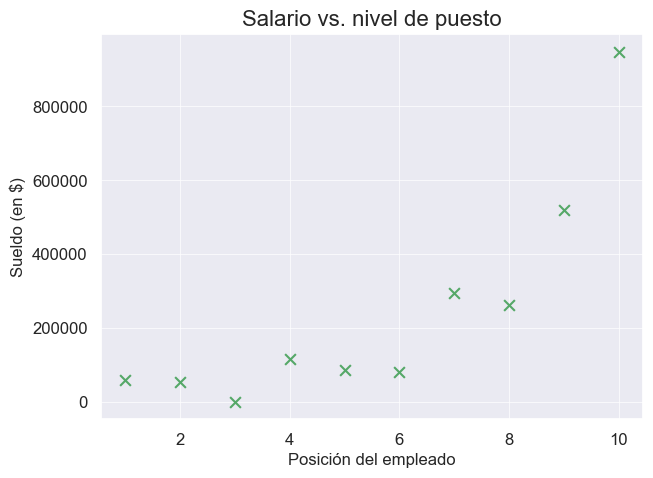

In [156]:
plt.figure(figsize=(7, 5))
plt.scatter(dataset['Level'], dataset['Salary'] , color='g', marker="x",s=60)
plt.grid(True, linewidth=0.5)
plt.xlabel("Posición del empleado", fontsize=12)
plt.ylabel("Sueldo (en $)", fontsize=12)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.title('Salario vs. nivel de puesto', fontsize=16)
plt.show()

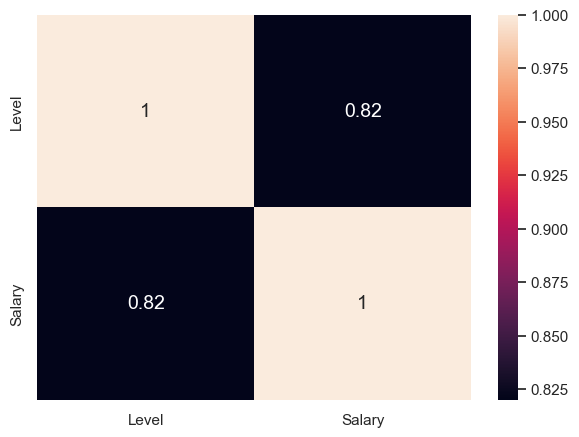

In [157]:
plt.figure(figsize=(7, 5))
correlacion = dataset[["Level", "Salary"]].corr().round(2)
sns.heatmap(data=correlacion, annot=True, annot_kws={"size": 14});

La correlación es bastante alta entre nivel y salario. Un detalle importante, correlación solo mide la relación entre variables como si fuera una relación lineal. Esto nos indica que pese a como se ve el diagrama de dispersión, la componente lineal explica bastante de la relación.

Como solo tenemos muy pocos datos, vamos a separar el dataset en testing en una sola observación. Esto es a fines didacticos. 

In [158]:
# Armamos array de Numpy con los features
X = dataset.iloc[:,1:-1].values
# Y con la variable dependendiente (target)
y = dataset.iloc[:,-1].values

In [159]:
# Separando nuestro dataset en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1, random_state=42)

# Datos de train y de test
print("Dimension de X_train:",X_train.shape)
print("Valores de y_train:",y_train.size)
print("Dimension de X_test:",X_test.shape)
print("Valores de y_test:",len(y_test))

Dimension de X_train: (9, 1)
Valores de y_train: 9
Dimension de X_test: (1, 1)
Valores de y_test: 1


El coeficiente de Pearson es 0.6321195021426658


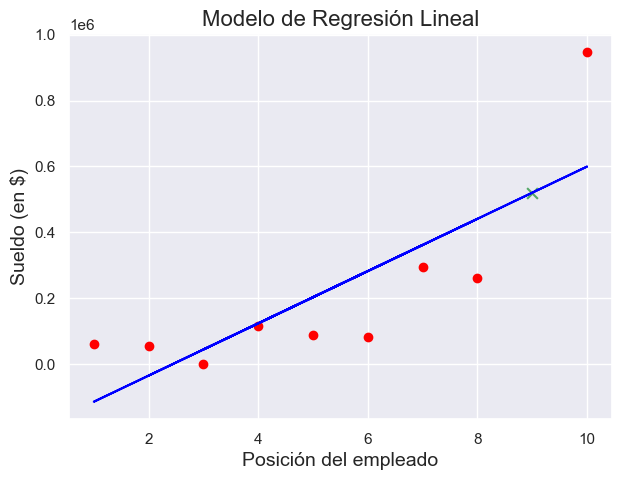

In [160]:
# Empezamos con un modelo lineal
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

plt.figure(figsize=(7, 5))
plt.scatter(X_train, y_train, color = "red")
plt.scatter(X_test, y_test , color='g', marker="x",s=60)
plt.plot(X_train, lin_reg.predict(X_train), color = "blue")
plt.title("Modelo de Regresión Lineal", fontsize=16)
plt.xlabel("Posición del empleado", fontsize=14)
plt.ylabel("Sueldo (en $)", fontsize=14);

print(f"El coeficiente de Pearson es {lin_reg.score(X_train, y_train)}")

El módulo de scikit-learn para implementar regresiones polinómicas es [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html).

El coeficiente de Pearson es 0.9231851948643621


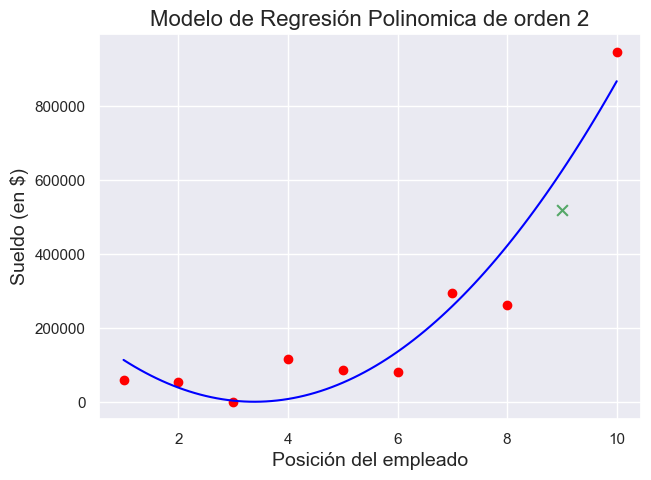

In [171]:
# Sigamos con un modelo cuadrático
from sklearn.preprocessing import PolynomialFeatures
pol_reg = PolynomialFeatures(degree = 2)
# Basicamente nos crea un array con los terminos lineal y cuadraticos
X_poly = pol_reg.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

plt.figure(figsize=(7, 5))
# Creamos valores para poder graficar "el ajuste"
X_grid = np.arange(np.min(X), np.max(X)+0.1, 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X_train, y_train, color = "red")
plt.scatter(X_test, y_test , color='g', marker="x",s=60)
plt.plot(X_grid, lin_reg_2.predict(pol_reg.fit_transform(X_grid)), color = "blue")
plt.title("Modelo de Regresión Polinomica de orden 2", fontsize=16)
plt.xlabel("Posición del empleado", fontsize=14)
plt.ylabel("Sueldo (en $)", fontsize=14);

print(f"El coeficiente de Pearson es {lin_reg_2.score(X_poly, y_train)}")

El coeficiente de Pearson es 0.9611087163289764


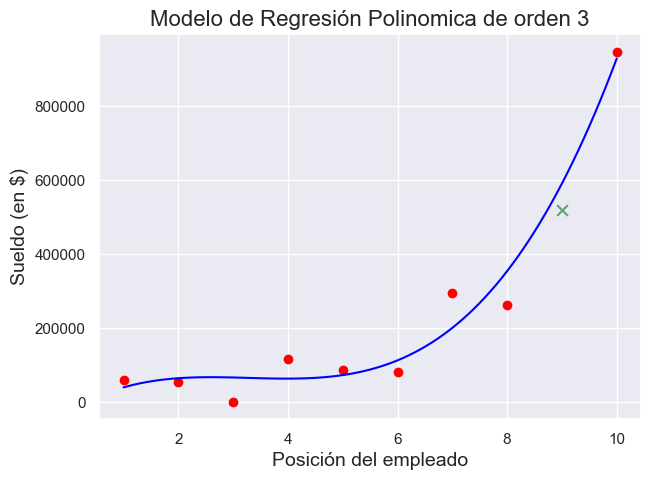

In [169]:
# Sigamos con un modelo de orden 3
from sklearn.preprocessing import PolynomialFeatures
pol_reg = PolynomialFeatures(degree = 3)
# Basicamente nos crea un array con los terminos lineal y cuadraticos
X_poly = pol_reg.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

plt.figure(figsize=(7, 5))
# Creamos valores para poder graficar "el ajuste"
X_grid = np.arange(np.min(X), np.max(X)+0.1, 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X_train, y_train, color = "red")
plt.scatter(X_test, y_test , color='g', marker="x",s=60)
plt.plot(X_grid, lin_reg_2.predict(pol_reg.fit_transform(X_grid)), color = "blue")
plt.title("Modelo de Regresión Polinomica de orden 3", fontsize=16)
plt.xlabel("Posición del empleado", fontsize=14)
plt.ylabel("Sueldo (en $)", fontsize=14);

print(f"El coeficiente de Pearson es {lin_reg_2.score(X_poly, y_train)}")

El coeficiente de Pearson es 0.970427967033401


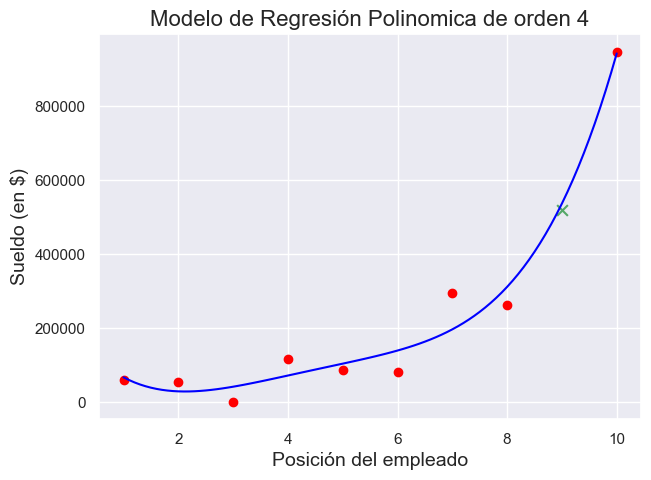

In [172]:
# Sigamos con un modelo de orden 4
from sklearn.preprocessing import PolynomialFeatures
pol_reg = PolynomialFeatures(degree = 4)
# Basicamente nos crea un array con los terminos lineal y cuadraticos
X_poly = pol_reg.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

plt.figure(figsize=(7, 5))
# Creamos valores para poder graficar "el ajuste"
X_grid = np.arange(np.min(X), np.max(X)+0.1, 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X_train, y_train, color = "red")
plt.scatter(X_test, y_test , color='g', marker="x",s=60)
plt.plot(X_grid, lin_reg_2.predict(pol_reg.fit_transform(X_grid)), color = "blue")
plt.title("Modelo de Regresión Polinomica de orden 4", fontsize=16)
plt.xlabel("Posición del empleado", fontsize=14)
plt.ylabel("Sueldo (en $)", fontsize=14);

print(f"El coeficiente de Pearson es {lin_reg_2.score(X_poly, y_train)}")

El coeficiente de Pearson es 0.9999999999999815


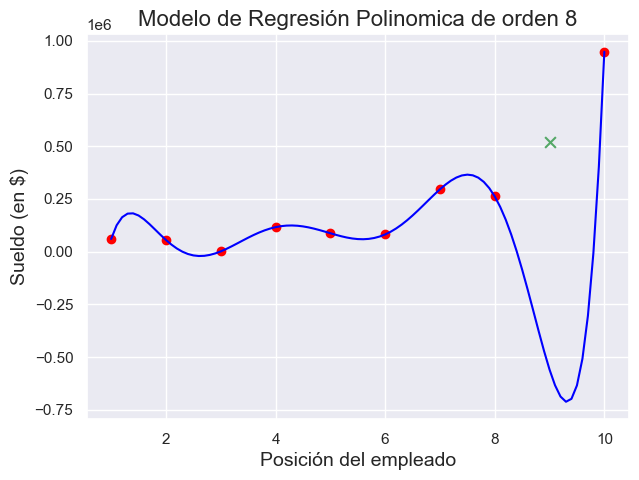

In [173]:
# Sigamos con un modelo de orden 8
from sklearn.preprocessing import PolynomialFeatures
pol_reg = PolynomialFeatures(degree = 8)
# Basicamente nos crea un array con los terminos lineal y cuadraticos
X_poly = pol_reg.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

plt.figure(figsize=(7, 5))
# Creamos valores para poder graficar "el ajuste"
X_grid = np.arange(np.min(X), np.max(X)+0.1, 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X_train, y_train, color = "red")
plt.scatter(X_test, y_test , color='g', marker="x",s=60)
plt.plot(X_grid, lin_reg_2.predict(pol_reg.fit_transform(X_grid)), color = "blue")
plt.title("Modelo de Regresión Polinomica de orden 8", fontsize=16)
plt.xlabel("Posición del empleado", fontsize=14)
plt.ylabel("Sueldo (en $)", fontsize=14);

print(f"El coeficiente de Pearson es {lin_reg_2.score(X_poly, y_train)}")

Vemos que el polinomio de grado 8 pasa perfectamente por todos los puntos de entrenamiento. Pero si vemos el valor de testing, el modelo predijo muy mal, inclusive predice un absurdo de sueldo negativos.

Cuando hablamos de que buscamos generalizar el modelo, hablamos de evitar estos efectos (aqui los exageramos para que sean evidentes). Esto es lo que se llama sobre-ajuste o overfitting, y significa que el modelo se entrenó para que responda muy bien a los datos de entrenamiento, pero es incapaz de predecir correctamente nuevos valores.